<a href="https://colab.research.google.com/github/Wahjoe45/PCVK_GENAP_2023/blob/main/Week8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# No. 1

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# No. 2
# Import library yang diperlukan
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im
import glob
from math import log10, sqrt


<BarContainer object of 256 artists>

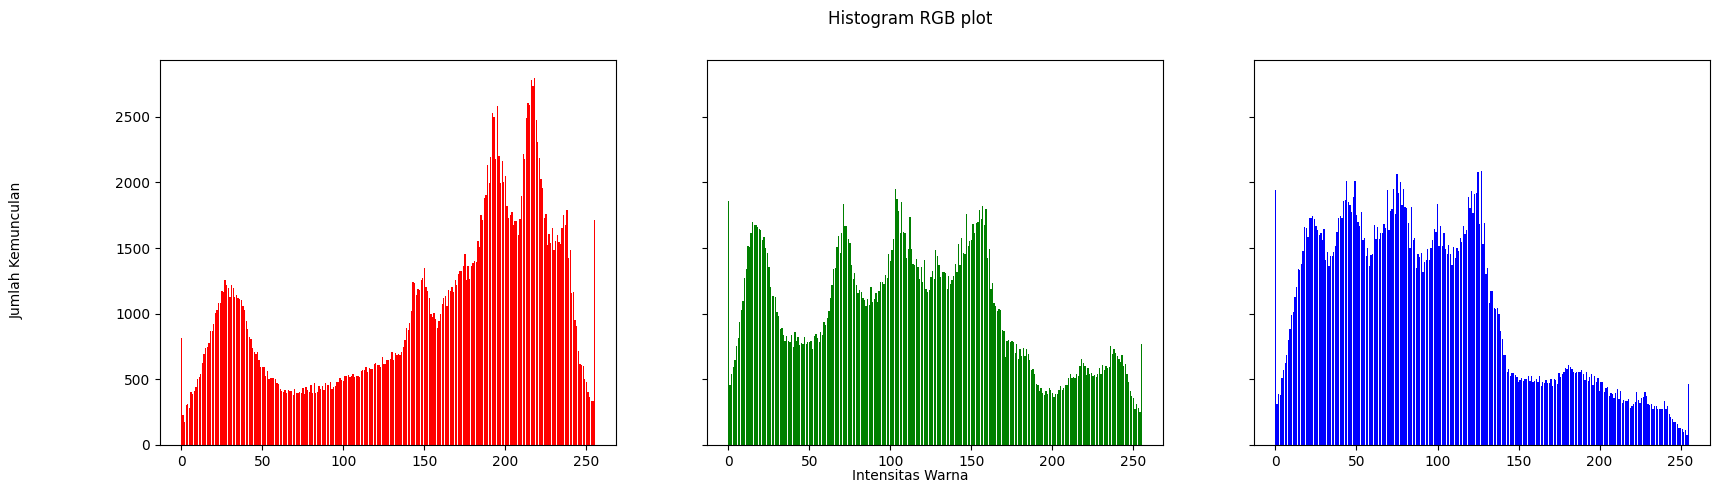

In [3]:
# No. 3
# Membuat histogram citra dengan gambar lena.jpg

# Input image
image = cv.imread('/content/drive/MyDrive/Semester 6/PCVK Tugas/Week 6/lena.jpg')
height, width, depth = np.shape(image)
names = np.arange(256)

# Menghitung jumlah kemunculan pixel
blue = [0]*256
green = [0]*256
red = [0]*256

for y in range(0,height):
  for x in range(0,width):
    blue[image[y][x][0]] += 1
    green[image[y][x][1]] += 1
    red[image[y][x][2]] += 1

# Membuat histogram citra
names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.05, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')

# menampilkan histogram citra
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')

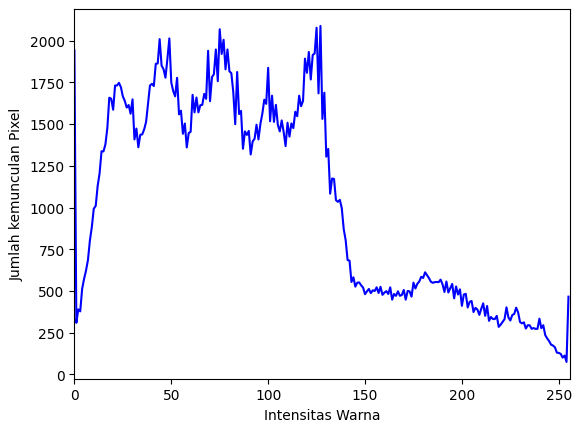

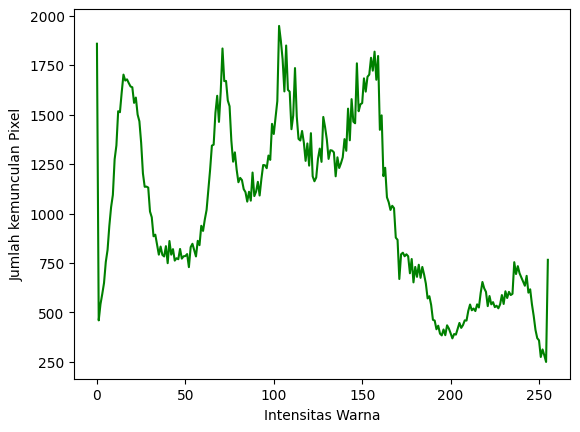

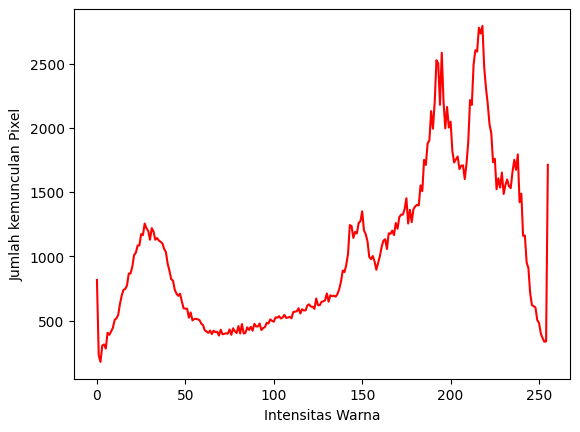

In [5]:
# No. 4
# Pembuatan Histogram dengan library numpy

colors = ("b","g","r")
channel_ids = (0, 1, 2)

plt.xlim([0, 256])
for channel_id, c in zip(channel_ids, colors):
  histogram, bin_edges = np.histogram(
      image[:, :, channel_id], bins=256, range =(0,256)
  )
  plt.plot(bin_edges[0:-1], histogram, color=c)

  plt.xlabel("Intensitas Warna")
  plt.ylabel("Jumlah kemunculan Pixel")

  plt.show()

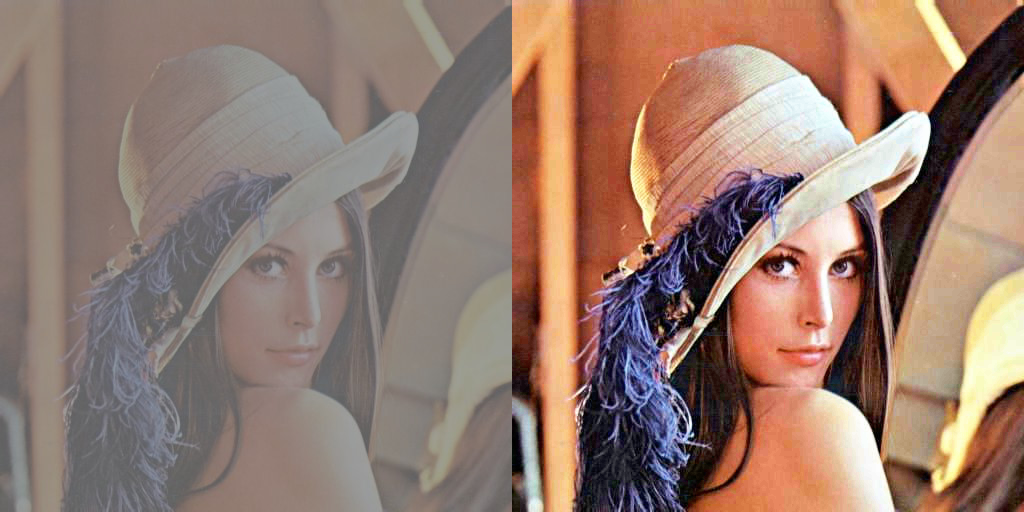

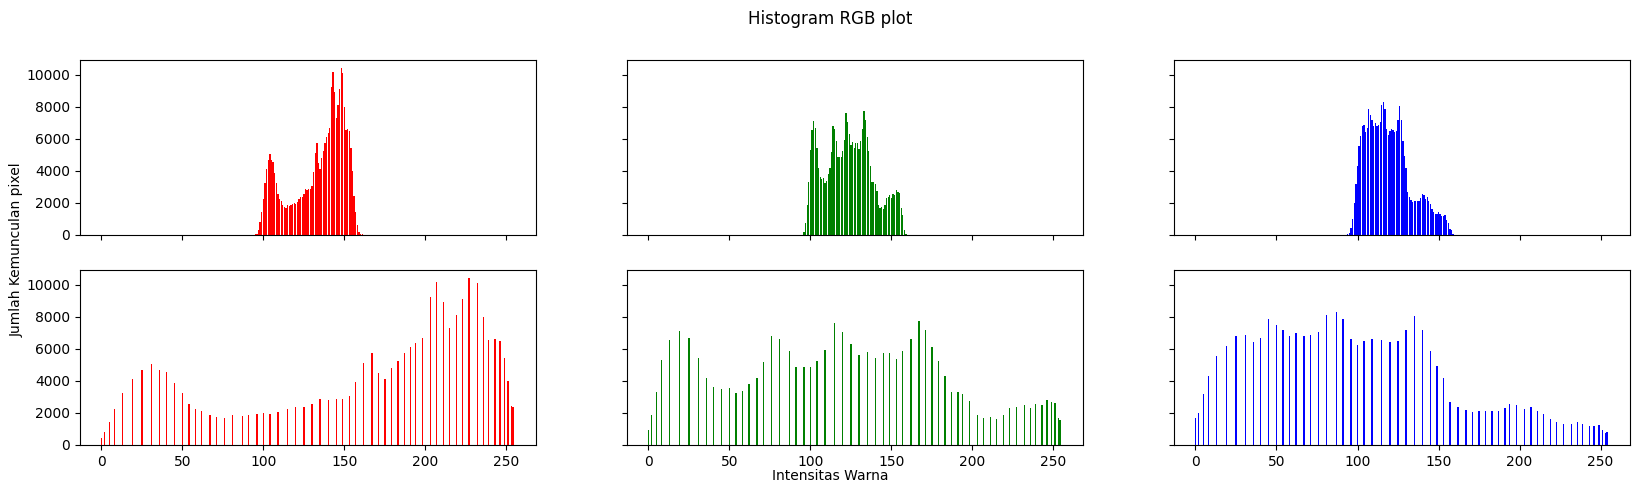

In [9]:
# No. 5
# Pembuatan histogram equalization

imglenalc = cv.imread('/content/drive/MyDrive/Semester 6/PCVK Tugas/Week 6/lena_lc.jpg')
def histogram(imglenalc):
  height, width, depth = np.shape(imglenalc) 
  ax = np.zeros((3,256)) 
  for y in range(0,height) : 
    for x in range(0,width) :
      ax[0][imglenalc[y][x][0]] += 1 
      ax[1][imglenalc[y][x][1]] += 1
      ax[2][imglenalc[y][x][2]] += 1 
  return ax

histo_asli = histogram(imglenalc)

imglenalc_array = np.asarray(imglenalc)

histogram_array = np.bincount(imglenalc_array.flatten(), minlength=256)

num_pixels = np. sum(histogram_array) 
histogram_array = histogram_array/num_pixels

chistogram_array = np.cumsum(histogram_array)

transform_map = np.floor(255 * chistogram_array). astype (np.uint8)

imglenalc_list = list(imglenalc_array.flatten())

eq_imglenalc_list = [transform_map[p] for p in imglenalc_list]

eq_imglenalc_array = np.reshape(np.asarray(eq_imglenalc_list), imglenalc_array.shape) 
img2 = eq_imglenalc_array

equal_histo = histogram(img2)

final_frame = cv.hconcat((imglenalc, img2))
cv2_imshow(final_frame)

names = np.arange (256) 
isgrayimg = np.array_equal(blue, green, red) 
if (isgrayimg == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True) 
  fig.suptitle('Histogram RGB plot') 
  fig.text(0.09, 0.5, 'Jumlah Kemunculan pixel', va='center', rotation='vertical') 
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center') 
  axs[0,0].bar(names, histo_asli[2], color='red') 
  axs[0,1].bar(names, histo_asli[1], color='green') 
  axs[0,2].bar(names, histo_asli[0], color='blue') 
  axs[1,0].bar(names, equal_histo[2], color='red') 
  axs[1,1].bar(names, equal_histo[1], color='green')
  axs[1,2].bar(names, equal_histo[0], color='blue') 
else:
  fig, axs = plt. subplots(1, 2, figsize=[20,5], sharex=True, sharey=True) 
  fig. suptitle('Histogram RGB plot') 
  fig.text(0.09, 0.5, 'Jumlah Kemunculan pixel', va='center', rotation='vertical') 
  fig.text(0.5, 0.94, 'Intensitas Warna', ha='center') 
  axs[0,0].bar(names, histo_asli[2], color='gray') 
  axs[0,1].bar(names, equal_histo[2], color='gray')
     


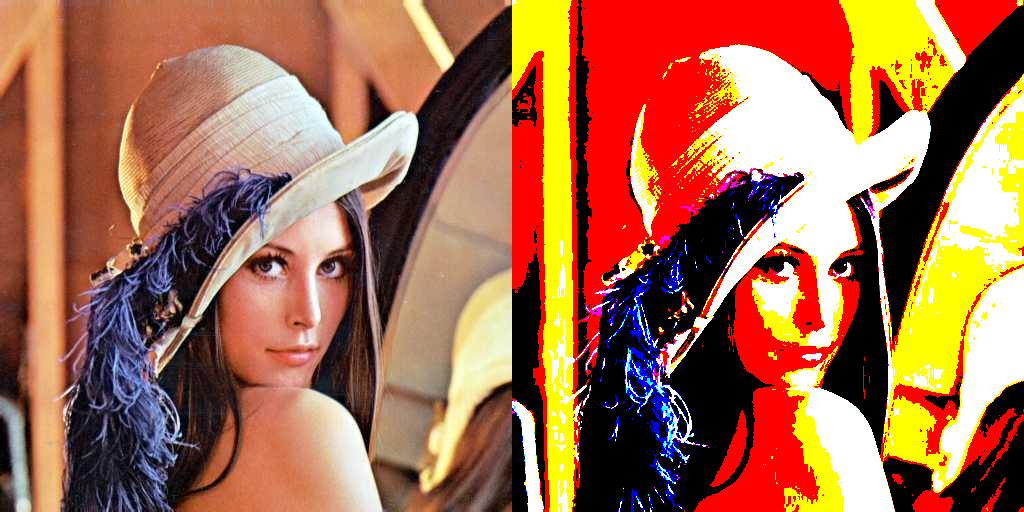

In [10]:
# No. 7
# Pemetaan 16 juta warna RGB ke dalam 8 warna saja

img_lena = cv.imread('/content/drive/MyDrive/Semester 6/PCVK Tugas/Week 6/lena.jpg')

def warna (r, g, b):
  pValue = 0
  minDistance = 255*255 + 255*255 + 255*255 + 1
  warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
  for i in range(len(warnaPallette)):
    rDiff = r - warnaPallette[i][0]
    gDiff = g - warnaPallette[i][1]
    bDiff = b - warnaPallette[i][2]
    distance = rDiff*rDiff + gDiff*gDiff + bDiff*bDiff
    if (distance < minDistance):
      minDistance = distance
      pValue = i
  return pValue

warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
map_16 = cv.cvtColor(img_lena, cv.COLOR_BGR2RGB)
img_8warna = np.zeros(map_16.shape, map_16.dtype)

for y in range(0, map_16.shape[0]):
  for x in range(0, map_16.shape[1]):
    baru = warna(map_16[y, x, 0], map_16[y, x, 1], map_16[y, x, 2])
    img_8warna[y, x] = warnaPallette[baru]
    
map_16 = cv.cvtColor(map_16, cv.COLOR_BGR2RGB)
img_8warna = cv.cvtColor(img_8warna, cv.COLOR_BGR2RGB)
final_frame = cv.hconcat((map_16, img_8warna))
cv2_imshow(final_frame)

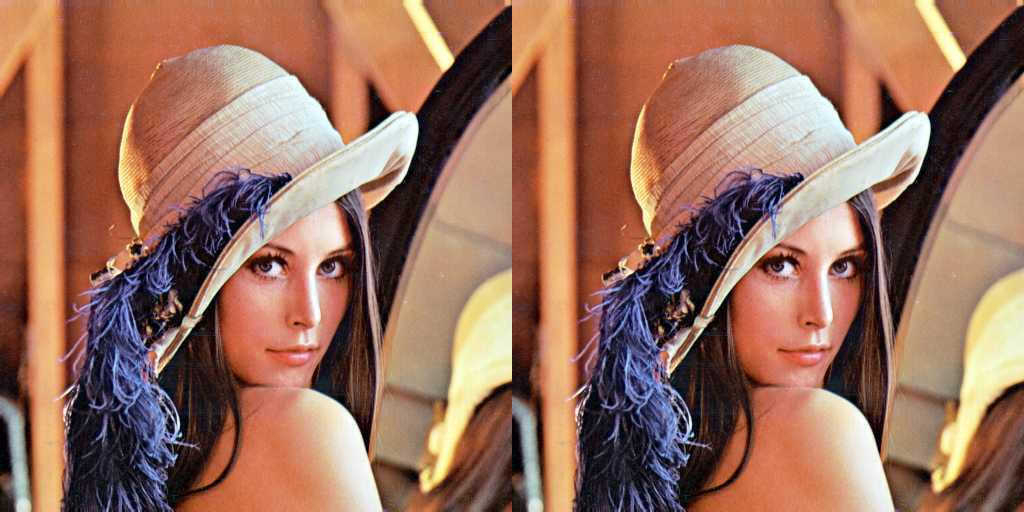

In [14]:
# No. 8
# Melakukan proses dithering floyd and steinberg pada lena.jpg

from PIL import Image

convert_img = Image.open('/content/drive/MyDrive/Semester 6/PCVK Tugas/Week 6/lena.jpg').convert(mode='RGB', dither=Image.FLOYDSTEINBERG)
convert_img.save('/content/drive/MyDrive/Semester 6/PCVK Tugas/Week 6/lena.jpg')


original_image = cv.imread('/content/drive/MyDrive/Semester 6/PCVK Tugas/Week 6/lena.jpg')

dither_image = cv.imread('/content/drive/MyDrive/Semester 6/PCVK Tugas/Week 6/lena.jpg')

# menampilkan gambar originald an gambar dithered

final_frame = cv.hconcat((original_image, dither_image))
cv2_imshow(final_frame)

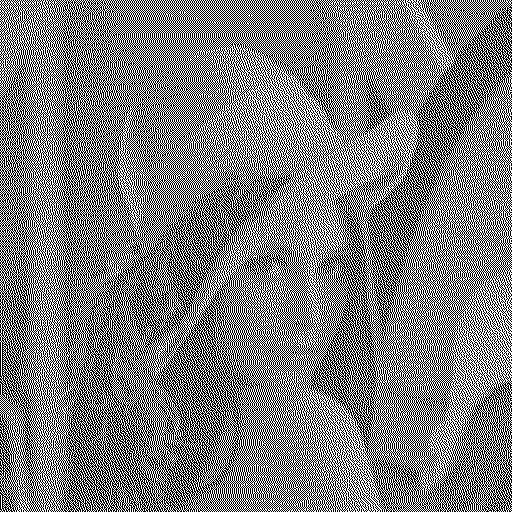

In [11]:
# No. 9
# mengubah gambar lena_lc.jpg menjadi gray image

from PIL import Image
import cv2
import numpy as np

convert_img = Image.open('/content/drive/MyDrive/Semester 6/PCVK Tugas/Week 6/lena_lc.jpg').convert(mode='1',dither=Image.FLOYDSTEINBERG)
convert_img.save('/content/drive/MyDrive/Semester 6/PCVK Tugas/Week 6/lena_lc.jpg')


Image = cv2.imread('/content/drive/MyDrive/Semester 6/PCVK Tugas/Week 6/lena_lc.jpg')

gray_image = cv2.cvtColor(Image, cv2.COLOR_BGR2GRAY)
cv2.imwrite('/content/drive/MyDrive/Semester 6/PCVK Tugas/Week 6/lena_lc.jpg', gray_image)

Height = gray_image.shape[0]
Width = gray_image.shape[1]

for y in range(0, Height):
    for x in range(0, Width):

        old_value = gray_image[y, x]
        new_value = 0
        if (old_value > 128) :
            new_value = 255

        gray_image[y, x] = new_value

        Error = old_value - new_value
        x=255
        y=255

        if(x) : NewNumber=255
        elif (NewNumber<0):NewNumber =0
        gray_image[y,x+1] = NewNumber

        if(x>0 and y) : NewNumber=255
        elif (NewNumber<0):NewNumber =0
        gray_image[y+1,x-1] = NewNumber

        if(y) : NewNumber=255
        elif (NewNumber<0):NewNumber =0
        gray_image[y+1,x] = NewNumber

        if(y) : NewNumber=255
        elif (NewNumber<0):NewNumber =0
        gray_image[y+1,x+1] = NewNumber

cv2.imwrite('/content/drive/MyDrive/PCVK/Modul6/lena_lc.jpg', gray_image)
cv2_imshow(gray_image)